<a id='top'></a>
# Indeed.com web scraper

This script implements the following functions:

* takes as input [URL](https://ca.indeed.com/jobs?q=data+scientist&l=Canada) to the first page of search results for a Data Scientist from [ca.indeed.com](https://ca.indeed.com/?r=us)
* generates a list containing URLs of all search pages showing results for a Data Scientist
* scrapes the HTML of every individual job posting
* parses the HTML to extract information with job details and skills mentioned in each job posting
* summarizes and displays results
* saves results to a .csv file

## Preparations

### Import libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import time
from IPython.display import HTML

### Define functions

#### Common part of the link is extracted from the following page element:

<div class="pagination" onmousedown="pclk(event);">Results&nbsp;Page:&nbsp;&nbsp;<b>1</b>&nbsp;&nbsp;<a onmousedown="addPPUrlParam &amp;&amp; addPPUrlParam(this);" href="/jobs?q=data+scientist&amp;l=Canada&amp;start=10" data-pp="AAoAAAFoZqgkkAAAAAFXSCBYAQEBCALrXYJuTQSs_jR2-csJgC4tCczsklNYN72HmP3dIjsagQqhcf-jmxJlFGCUC5ge_FHPKA"><span class="pn">2</span></a>&nbsp;&nbsp;<a onmousedown="addPPUrlParam &amp;&amp; addPPUrlParam(this);" href="/jobs?q=data+scientist&amp;l=Canada&amp;start=20" data-pp="ABQAAAFoZqgkkAAAAAFXSCBYAQIBCBYHAK9oIvlQ7ma5O7RQ10OywgMDrqdo7hgb38E6MjUSW-9JsWrwNuXJhmp_mXrc-SBKc9VfGQ_j31bifuiAW_IU96mh"><span class="pn">3</span></a>&nbsp;&nbsp;<a onmousedown="addPPUrlParam &amp;&amp; addPPUrlParam(this);" href="/jobs?q=data+scientist&amp;l=Canada&amp;start=30" data-pp="AB4AAAFoZqgkkAAAAAFXSCBYAQIBCBILNhrPEpk28Saslvqtc58RJ17f7BLY31zKPkhZB5B4nXYeT-D0-XdRInCcZcRk7nI_wgYZue01ZMnMx1M-iV35qwdPLndLhDsnH4EpwRY3H5IJ"><span class="pn">4</span></a>&nbsp;&nbsp;<a onmousedown="addPPUrlParam &amp;&amp; addPPUrlParam(this);" href="/jobs?q=data+scientist&amp;l=Canada&amp;start=40" data-pp="ACgAAAFoZqgkkAAAAAFXSCBYAQMBCBIMIAcHCtUrvKV0P-DHbL0AnBbTSKXxCTvXd0siyDQR4qiP4kePlDlNP2tvXED40V5bBIZWx_1qDo0RP6vsOfLuyN1MZW9SsQy02dvtEPrFu5TxVkJ0EdhTLqjnVmKJumGF"><span class="pn">5</span></a>&nbsp;&nbsp; <a onmousedown="addPPUrlParam &amp;&amp; addPPUrlParam(this);" href="/jobs?q=data+scientist&amp;l=Canada&amp;start=10" data-pp="AAoAAAFoZqgkkAAAAAFXSCBYAQEBCALrXYJuTQSs_jR2-csJgC4tCczsklNYN72HmP3dIjsagQqhcf-jmxJlFGCUC5ge_FHPKA"><span class="pn"><span class="np">Next&nbsp;»</span></span></a></div>

HTML code of the element:

<div class="pagination" onmousedown="pclk(event);">Results&nbsp;Page:&nbsp;&nbsp;<b>1</b>&nbsp;&nbsp;<a onmousedown="addPPUrlParam &amp;&amp; addPPUrlParam(this);" href="/jobs?q=data+scientist&amp;l=Canada&amp;start=10" data-pp="AAoAAAFoZqgkkAAAAAFXSCBYAQEBCALrXYJuTQSs_jR2-csJgC4tCczsklNYN72HmP3dIjsagQqhcf-jmxJlFGCUC5ge_FHPKA"><span class="pn">2</span></a>&nbsp;&nbsp;<a onmousedown="addPPUrlParam &amp;&amp; addPPUrlParam(this);" href="/jobs?q=data+scientist&amp;l=Canada&amp;start=20" data-pp="ABQAAAFoZqgkkAAAAAFXSCBYAQIBCBYHAK9oIvlQ7ma5O7RQ10OywgMDrqdo7hgb38E6MjUSW-9JsWrwNuXJhmp_mXrc-SBKc9VfGQ_j31bifuiAW_IU96mh"><span class="pn">3</span></a>&nbsp;&nbsp;<a onmousedown="addPPUrlParam &amp;&amp; addPPUrlParam(this);" href="/jobs?q=data+scientist&amp;l=Canada&amp;start=30" data-pp="AB4AAAFoZqgkkAAAAAFXSCBYAQIBCBILNhrPEpk28Saslvqtc58RJ17f7BLY31zKPkhZB5B4nXYeT-D0-XdRInCcZcRk7nI_wgYZue01ZMnMx1M-iV35qwdPLndLhDsnH4EpwRY3H5IJ"><span class="pn">4</span></a>&nbsp;&nbsp;<a onmousedown="addPPUrlParam &amp;&amp; addPPUrlParam(this);" href="/jobs?q=data+scientist&amp;l=Canada&amp;start=40" data-pp="ACgAAAFoZqgkkAAAAAFXSCBYAQMBCBIMIAcHCtUrvKV0P-DHbL0AnBbTSKXxCTvXd0siyDQR4qiP4kePlDlNP2tvXED40V5bBIZWx_1qDo0RP6vsOfLuyN1MZW9SsQy02dvtEPrFu5TxVkJ0EdhTLqjnVmKJumGF"><span class="pn">5</span></a>&nbsp;&nbsp; <a onmousedown="addPPUrlParam &amp;&amp; addPPUrlParam(this);" href="/jobs?q=data+scientist&amp;l=Canada&amp;start=10" data-pp="AAoAAAFoZqgkkAAAAAFXSCBYAQEBCALrXYJuTQSs_jR2-csJgC4tCczsklNYN72HmP3dIjsagQqhcf-jmxJlFGCUC5ge_FHPKA"><span class="pn"><span class="np">Next&nbsp;»</span></span></a></div>

#### Total number of results is extracted from the following page element:

<div id="searchCount">
        Page 1 of 1,031 jobs</div>

HTML code of the element:

<div id="searchCount">
        Page 1 of 1,031 jobs</div>

#### `get_all_search_pages`

In [2]:
def get_all_search_pages(url, max_postings=0):
    """
    a function to generate links to all subsequent search results pages

    Input arguments: 'url'   -- str  -- starting page url, a page from search results
          'max_postings'   -- int  -- option to limit number of results returned
                                        (0 means no limit, return full results)

    Returns: 'list_of_all_urls' -- list -- list of all subsequent URLs
             'total_results'    -- int  -- total number of jobs postings found
    """

    # get the HTML of the first search results page
    r = requests.get(url)
    content = r.text

    # make a soup out of the first page of search results
    soup_1 = BeautifulSoup(content, 'lxml')

    # extract the number of search results
    num_results_str = soup_1.find('div', {'id': 'searchCount'}).text
    # parse the string and extract the total number (4th element), replace comma with an empty space, convert to int
    total_results = int(num_results_str.split()[3].replace(',', ''))

    # add the common part between all search pages
    next_pages_links = "https://www.indeed.ca" + \
                       soup_1.find('div', {'class': 'pagination'}) \
                       .find('a').get('href')[:-2]

    print(next_pages_links)

    # create empty list to store URLs of all search results pages
    list_of_all_urls = list()

    # add the first page to the 'list_of_all_urls'
    list_of_all_urls.append(next_pages_links)

    if max_postings:
        # generate subsequent search results links (max postings -- parameter 'max_postings')
        for start_position in range(20, max_postings, 20):
            list_of_all_urls.append(next_pages_links + str(start_position))
    else:
        # generate subsequent search results links (max postings -- total search results)
        for start_position in range(20, total_results, 20):
            list_of_all_urls.append(next_pages_links + str(start_position))

    print("Search returned a total of {0} results.".format(total_results))
    print("A list with {0} links to subsequent search results pages was returned."
          .format(len(list_of_all_urls)))
    if max_postings:
        print("Returned list contains links to the first {0} job postings, as per the provided 'max_postings."
              .format(max_postings))

    return list_of_all_urls, total_results


#### `scrape_job_posts`

In [3]:
def scrape_job_posts(list_of_all_urls, time_delay=0.5):
    """
    a function to scrape individual job postings
    (via another function 'scrape_job_info')

    gets HTML of each search page from the list
    generated by the function 'get_all_search_pages',
    parses links to individual job postings
    from search results pages, and then scrapes those
    job postings

    Input arguments: list_of_all_urls   -- list  -- list containing URLs of all pages with job search results
                     time_delay           -- float -- delay used between requests to indeed server
    """
    # dictionary used to store results of scraping
    scraping_results_dict = dict()
    num_page = 0
    for search_page_url in list_of_all_urls:

        # get the HTML of the search results page
        page = requests.get(search_page_url)
        content = page.text
        # make a soup out of the HTML
        soup = BeautifulSoup(content, 'lxml')

        # find all <div> tags containing each job posting links and feed them to the function 'scrape_job_info'
        links = soup.find_all('div', {'class': 'jobsearch-SerpJobCard row result'})
        links += soup.find_all('div', {'class': 'jobsearch-SerpJobCard row sjlast result'})
        links += soup.find_all('div', {'class': 'jobsearch-SerpJobCard lastRow row result'})

        num_scraped = 0

        for job_link in links:
            # extract the individual job posting link from a <div> tag
            full_job_link = "https://www.indeed.ca" + job_link.find('a')['href']

            # get the HTML code from the job posting page and save it as text to 'scraping_results_dict'
            # link to the job posting is used as a key and HTML code of the job posting as a value
            job_html = requests.get(full_job_link)
            scraping_results_dict[full_job_link] = job_html.text
            num_scraped += 1

            # sleep for 0.5 second, to avoid too frequent requests to the indeed.ca server
            time.sleep(time_delay)
        num_page += 1
        print("Scraped {0} individual job postings from page {1} of {2}."
              .format(num_scraped, num_page, len(list_of_all_urls)))

    print("--- {0} job postings have been scraped and saved to 'scraping_results_dict'."
          .format(len(scraping_results_dict)))
    return scraping_results_dict


<a id='generate_links'></a>
## Generate links to all search results pages

Back to the [top](#top)

### Set starting pages:

#### Managerial job titles

In [4]:
mng_start_pages_dict = dict()

job_title = 'Management analytics'
search_location = '&l=Canada&start'

mng_start_pages_dict[job_title] = 'https://www.indeed.ca/jobs?q=' + \
                                '+'.join(job_title.lower().split())\
                                    + search_location
HTML(mng_start_pages_dict[job_title])

In [5]:
job_title = 'Business analyst'
search_location = '&l=Canada&start'

mng_start_pages_dict[job_title] = 'https://www.indeed.ca/jobs?q=' + \
                                '+'.join(job_title.lower().split())\
                                    + search_location
HTML(mng_start_pages_dict[job_title])

In [6]:
job_title = 'Data manager'
search_location = '&l=Canada&start'

mng_start_pages_dict[job_title] = 'https://www.indeed.ca/jobs?q=' + \
                                '+'.join(job_title.lower().split())\
                                    + search_location
HTML(mng_start_pages_dict[job_title])

In [7]:
job_title = 'Analytics manager'
search_location = '&l=Canada&start'

mng_start_pages_dict[job_title] = 'https://www.indeed.ca/jobs?q=' + \
                                '+'.join(job_title.lower().split())\
                                    + search_location
HTML(mng_start_pages_dict[job_title])

In [8]:
job_title = 'AI systems designer'
search_location = '&l=Canada&start'

mng_start_pages_dict[job_title] = 'https://www.indeed.ca/jobs?q=' + \
                                '+'.join(job_title.lower().split())\
                                    + search_location
HTML(mng_start_pages_dict[job_title])

#### Technical job titles

In [9]:
tech_start_pages_dict = dict()

job_title = 'Data analyst'
search_location = '&l=Canada&start'

tech_start_pages_dict[job_title] = 'https://www.indeed.ca/jobs?q=' + \
                                '+'.join(job_title.lower().split())\
                                    + search_location
HTML(tech_start_pages_dict[job_title])

In [10]:
job_title = 'Data Scientist'
search_location = '&l=Canada&start'

tech_start_pages_dict[job_title] = 'https://www.indeed.ca/jobs?q=' + \
                                '+'.join(job_title.lower().split())\
                                    + search_location
HTML(tech_start_pages_dict[job_title])

### Example of generating a list containing URLs of all pages with search results

Function `'get_all_search_pages'` is used to generate a `'List_of_all_URLs'`.

In [11]:
list_of_all_urls1, total_results1 = get_all_search_pages(tech_start_pages_dict['Data Scientist'], 
                                                         max_postings=200)

https://www.indeed.ca/jobs?q=data+scientist&l=Canada&start=
Search returned a total of 1086 results.
A list with 10 links to subsequent search results pages was returned.
Returned list contains links to the first 200 job postings, as per the provided 'max_postings.


In [12]:
list_of_all_urls1

['https://www.indeed.ca/jobs?q=data+scientist&l=Canada&start=',
 'https://www.indeed.ca/jobs?q=data+scientist&l=Canada&start=20',
 'https://www.indeed.ca/jobs?q=data+scientist&l=Canada&start=40',
 'https://www.indeed.ca/jobs?q=data+scientist&l=Canada&start=60',
 'https://www.indeed.ca/jobs?q=data+scientist&l=Canada&start=80',
 'https://www.indeed.ca/jobs?q=data+scientist&l=Canada&start=100',
 'https://www.indeed.ca/jobs?q=data+scientist&l=Canada&start=120',
 'https://www.indeed.ca/jobs?q=data+scientist&l=Canada&start=140',
 'https://www.indeed.ca/jobs?q=data+scientist&l=Canada&start=160',
 'https://www.indeed.ca/jobs?q=data+scientist&l=Canada&start=180']

###  Generate a list containing URLs of all pages with search results 

Function `'get_all_search_pages'` is used to generate a `'list_of_all_urls'` for all starting search pages.

#### Managerial roles

In [13]:
# limit max job postings, will be used to determine how many search results pages are returned
max_postings = 200

# dict that is used to store lists of links and number of results generated from each starting page
mng_all_links_dict = dict()

for job_title, start_page in mng_start_pages_dict.items():
    
    # create a new entry in the dictionary of results
    mng_all_links_dict[job_title] = dict()
    
    # generate a list of links to all subsequent search pages
    mng_all_links_dict[job_title]['links_list'], \
        mng_all_links_dict[job_title]['total_results'] =\
        get_all_search_pages(start_page, max_postings=max_postings)

https://www.indeed.ca/jobs?q=management+analytics&l=Canada&start=
Search returned a total of 5827 results.
A list with 10 links to subsequent search results pages was returned.
Returned list contains links to the first 200 job postings, as per the provided 'max_postings.
https://www.indeed.ca/jobs?q=business+analyst&l=Canada&start=
Search returned a total of 6482 results.
A list with 10 links to subsequent search results pages was returned.
Returned list contains links to the first 200 job postings, as per the provided 'max_postings.
https://www.indeed.ca/jobs?q=data+manager&l=Canada&start=
Search returned a total of 16446 results.
A list with 10 links to subsequent search results pages was returned.
Returned list contains links to the first 200 job postings, as per the provided 'max_postings.
https://www.indeed.ca/jobs?q=analytics+manager&l=Canada&start=
Search returned a total of 3865 results.
A list with 10 links to subsequent search results pages was returned.
Returned list contain

#### Technical roles

In [14]:
# limit max job postings, will be used to determine how many search results pages are returned
max_postings = 200

# dict that is used to store lists of links and number of results generated from each starting page
tech_all_links_dict = dict()

for job_title, start_page in tech_start_pages_dict.items():
    
    # create a new entry in the dictionary of results
    tech_all_links_dict[job_title] = dict()
    
    # generate a list of links to all subsequent search pages
    tech_all_links_dict[job_title]['links_list'], \
        tech_all_links_dict[job_title]['total_results'] =\
        get_all_search_pages(start_page, max_postings=max_postings)

https://www.indeed.ca/jobs?q=data+analyst&l=Canada&start=
Search returned a total of 4943 results.
A list with 10 links to subsequent search results pages was returned.
Returned list contains links to the first 200 job postings, as per the provided 'max_postings.
https://www.indeed.ca/jobs?q=data+scientist&l=Canada&start=
Search returned a total of 1088 results.
A list with 10 links to subsequent search results pages was returned.
Returned list contains links to the first 200 job postings, as per the provided 'max_postings.


<a id='scraping_html'></a>
## Scraping the job details

Back to the [top](#top)

List of all search results pages is used to scrape details about each posting.


* `'List_of_all_URLs'` generated by the function `'get_all_search_results'` is fed into the function `'scrape_job_links_and_info'`
* each page of job search results is parsed for < div > tags containing links to individual job postings
* function `'scrape_job_links_and_info'` feeds lists of < div > tags into the function `'scrape_job_info'`
* function `'scrape_job_info'` gets HTML code of each job posting and saves it as a **(key) -- (value)** pair of **(link to posting) -- (its HTML code)** 
* results are saved to a global dictionary `'scraping_results_dict'`

### Example: scraping a single search results page

In [16]:
list_of_all_urls1 = [mng_all_links_dict['Management analytics']['links_list'][0]]
list_of_all_urls1

['https://www.indeed.ca/jobs?q=management+analytics&l=Canada&start=']

In [17]:
%%time
scraping_results_dict1 = scrape_job_posts(list_of_all_urls1, time_delay=0.5)

Scraped 27 individual job postings from page 1 of 1.
--- 27 job postings have been scraped and saved to 'scraping_results_dict'.
Wall time: 31.1 s


### Estimating amount of time it would take to complete scraping of all pages (in minutes)

In [18]:
time_page_completed = 31.1
page_job_posts = 27
max_posts_per_search = 200
searches_total = 7

print("Scraping of job postings from {0} job title searches with {1} max postings per search should take\
 roughly {2:.2f} minutes".format(searches_total,
                               max_posts_per_search,
(time_page_completed / page_job_posts) * max_posts_per_search * searches_total / 60
))

Scraping of job postings from 7 job title searches with 200 max postings per search should take roughly 26.88 minutes


### Scrape all the job postings

#### Managerial roles

In [19]:
mng_scraping_results_dict = dict()

print("----- Starting scraping indeed.ca...")

for job_title, values in mng_all_links_dict.items():

    print("\n----- Scraping postings for '{0}'".format(job_title))
    results_dict = scrape_job_posts(values['links_list'], time_delay=0.5)
    mng_scraping_results_dict.update(results_dict)

----- Starting scraping indeed.ca...

----- Scraping postings for 'Management analytics'
Scraped 27 individual job postings from page 1 of 10.
Scraped 27 individual job postings from page 2 of 10.
Scraped 27 individual job postings from page 3 of 10.
Scraped 26 individual job postings from page 4 of 10.
Scraped 26 individual job postings from page 5 of 10.
Scraped 26 individual job postings from page 6 of 10.
Scraped 26 individual job postings from page 7 of 10.
Scraped 26 individual job postings from page 8 of 10.
Scraped 26 individual job postings from page 9 of 10.
Scraped 26 individual job postings from page 10 of 10.
--- 234 job postings have been scraped and saved to 'scraping_results_dict'.

----- Scraping postings for 'Business analyst'
Scraped 27 individual job postings from page 1 of 10.
Scraped 27 individual job postings from page 2 of 10.
Scraped 0 individual job postings from page 3 of 10.
Scraped 27 individual job postings from page 4 of 10.
Scraped 27 individual job post

#### Technical roles

In [20]:
tech_scraping_results_dict = dict()

print("----- Starting scraping indeed.ca...")

for job_title, values in tech_all_links_dict.items():

    print("\n----- Scraping postings for '{0}'".format(job_title))
    results_dict = scrape_job_posts(values['links_list'], time_delay=0.5)
    tech_scraping_results_dict.update(results_dict)

----- Starting scraping indeed.ca...

----- Scraping postings for 'Data analyst'
Scraped 27 individual job postings from page 1 of 10.
Scraped 27 individual job postings from page 2 of 10.
Scraped 27 individual job postings from page 3 of 10.
Scraped 27 individual job postings from page 4 of 10.
Scraped 27 individual job postings from page 5 of 10.
Scraped 27 individual job postings from page 6 of 10.
Scraped 27 individual job postings from page 7 of 10.
Scraped 27 individual job postings from page 8 of 10.
Scraped 27 individual job postings from page 9 of 10.
Scraped 27 individual job postings from page 10 of 10.
--- 248 job postings have been scraped and saved to 'scraping_results_dict'.

----- Scraping postings for 'Data Scientist'
Scraped 26 individual job postings from page 1 of 10.
Scraped 0 individual job postings from page 2 of 10.
Scraped 27 individual job postings from page 3 of 10.
Scraped 26 individual job postings from page 4 of 10.
Scraped 26 individual job postings from 

<a id='parsing_jobs'></a>
## 4. Parsing job postings

Back to the [top](#top)

Job details and mentioned skills are parsed from each job posting scraped previously by the function `'scrape_job_links_and_info'`.

* `'skill_keywords_dict'` is defined: category of skills and corresponding lists of keywords
* function `'parse_job_info'` is run:
    * takes the dictionary with scraped job postings as input
    * loops over the key(link)--value(HTML code) pairs
    * uses BeautifulSoup to extract job details from HTML tags
    * uses `'skills_keywords_dict'` to check keywords mentioned in job descriptions
    * saves results to `'results_dict'`
* `'resutls_dict'` is converted to a DataFrame, DataFrame is transposed, index is reset to a range index.

In [65]:
%%time

results_dict = {}   # empty dictionary to store results of parsing of job pages

# dictionary with skills used to parse job descriptions, categories become columns in the resulting DataFrame
skills_keywords_dict = {
                            # tech skills
                            'Excel': ['Excel'],
                            'Python': ['Python'],
                            'R': ['R ', ' R ', 'R,', 'R/'], # 'R' surroinded by spaces and sings
                            'Ruby': ['Ruby'],
                            'Java/Scala': ['Java', 'JVM', 'Scala'],
                            'C/C++': ['C/C++', 'C++', ' C '],   # 'C' surrounded by spaces and sings
                            'MATLAB': ['MATLAB'],
                            'SAS': ['SAS'],
                            'SQL/databases': ['SQL', 'databases'],
                            'SPSS': ['SPSS'],
                            'Stata': ['Stata'],
                            'RapidMiner': ['RapidMiner', 'Rapid Miner'],
                            'Machine Learning': ['Machine Learning', 'ML', 'Data Mining', 'DM'],
                            'NLP': ['Natural Language Processing', 'NLP'],
                            'Visualisation': ['Visualisation', 'Visualization'],
                            'Big Data': ['Big Data', 'Spark', 'kafka', 'Hive', 'beam', 'Hadoop', 'MapReduce', 'Hbase'],
                            'Cloud': ['Cloud', 'AWS', 'GCP', 'Azure ', 'Google Cloud'],
                            'REST': ['REST', 'flask', 'Sinatra'],
                            'Math': ['Algebra', 'Statistics', 'Operations research'],
                            'DevOps': ['DevOps', 'TDD', 'test-driven', 'GitHub'],
                            # soft skills
                            'communication': ['communication', 'presentation'],
                            'problem solving': ['problem solving'],
                            'project_management': ['project management'],
                            'leadership': ['leadership'],
                            'consulting': ['consulting']
                        }


def parse_job_info(scraping_results_dict, skills_keywords_dict):
    """
    function to parse job info from previously scraped job pages
    extracts info from HTML of each job page, saves it to the dictionary 'results_dict'
    
    Input arguments: scraping_results_dict -- dictionary -- contains 'link'--'HTML code' pairs of job postings
                     skills_keywords_dict   -- dictionary -- contaings skills categories and corresponding lists of keywords
    """
    global resutls_dict    # global dict used to store results of scraping
    
    # loop over all key(link)-value(HTML code) pairs in scraping results
    for link, job_html_text in scraping_results_dict.items():
        
        # make a soup out of a job posting HTML code
        soup_job = BeautifulSoup(job_html_text, 'lxml')
        
        results_dict[link] = {} # create a new sub-dictionary in the 'results_dict' with the job link as key
        
        # extract job title from the job page
        try:
            results_dict[link]['job_title'] = soup_job.find_all('h3', 
                                {'class':"icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title"})[0].text   
        except IndexError:
            results_dict[link]['job_title'] = 'Not found'
        # extract company name
        try:
            results_dict[link]['company_name'] = soup_job.find_all('div', 
                                                                   {'class': 'icl-u-lg-mr--sm icl-u-xs-mr--xs'})[0].text 
        except IndexError:
            results_dict[link]['company_name'] = 'Not found'
        # extract job location
        try:
            # get the part of the <div> tag containing location ("MindGeek 47 reviews-Montréal, QC" on top of a job posting page)
            location_line = soup_job.find_all('div', 
              {'class':"jobsearch-InlineCompanyRating icl-u-xs-mt--xs jobsearch-DesktopStickyContainer-companyrating"})[0]
            # convert the tag to string, split by '-', select the second element (contains job location)
            results_dict[link]['job_location'] = location_line.text.split('-')[1]
        except IndexError:
            results_dict[link]['job_location'] = 'Not found'
        # extract job description section
        try:
            results_dict[link]['job_description'] = soup_job.find_all('div', 
                                            {'class': 'jobsearch-JobComponent-description icl-u-xs-mt--md'})[0].text
        except IndexError:
            results_dict[link]['job_description'] = 'Not found'
        # extract date posted
        try:
            results_dict[link]['date'] = soup_job.find_all('div', 
                                                        {'class':'jobsearch-JobMetadataFooter'})[0].text.split(' - ')[1]
        except IndexError:
            results_dict[link]['date'] = 'Not found'
                
        # search for the skills
        soup_job_text = soup_job.text
        for skill_category, skills in skills_keywords_dict.items(): # loop over all keys and sublists in 'skills_keywords_dict'
            
            category_found = 0   # variable used to store results of the intermediate check (loop below)
            
            for skill in skills:        # loop over all skills in the sublist of 'skills_keywords_dict'
                if soup_job_text.find(skill) != -1:     # if skill from the sublist is found, set 'category_found' to 1
                    category_found = 1
            
            results_dict[link][skill_category] = category_found   # skill set to 1 if found, 0 if not, in 'results_dict'
        
# feed all job page HTMLs (values in 'scraping_results_dict') to function 'parse_job_info'
parse_job_info(scraping_results_dict, skills_keywords_dict)
results_df = pd.DataFrame(results_dict).T.reset_index()

Wall time: 7.95 s


#### Display the top 5 rows of the DataFrame with results

In [66]:
results_df.head()

,index,Big Data,C/C++,Cloud,DevOps,Excel,Java/Scala,MATLAB,Machine Learning,Math,...,communication,company_name,consulting,date,job_description,job_location,job_title,leadership,problem solving,project_management
0,https://www.indeed.ca/pagead/clk?mo=r&ad=-6NYl...,0,0,0,0,1,1,0,1,0,...,1,Westman Communications Group,0,save job,WESTMAN COMMUNICATIONS GROUP is seeking applic...,"Brandon, MB",MANAGEMENT INFORMATION SYSTEMS ANALYST,0,0,0
1,https://www.indeed.ca/pagead/clk?mo=r&ad=-6NYl...,0,0,0,0,1,0,0,0,0,...,0,Blume,1,save job,"$90,000 - $120,000 a yearJob SummaryValues1. G...","Vancouver, BC",Growth Marketer & Analytics,1,0,0
2,https://www.indeed.ca/pagead/clk?mo=r&ad=-6NYl...,0,0,0,0,0,0,0,1,0,...,0,OMERS,0,11 days ago,"Toronto, ONWhy join us?\nWe are looking for a ...","Toronto, ON",Director – Data Analytics & Insights,0,0,0
3,https://www.indeed.ca/rc/clk?jk=0bcee6d714c4a9...,0,0,0,0,0,0,0,0,0,...,1,CIBC,0,2 days ago,"Toronto, ONWe’re on a mission to build the rel...","Toronto, ON","Consultant, Digital Strategy & Analytics",0,0,0
4,https://www.indeed.ca/rc/clk?jk=842e9e8efa012f...,0,0,1,0,0,1,0,1,0,...,0,CIBC,0,9 days ago,We’re on a mission to build the relationship-f...,"Toronto, ON","Consultant, Google Analytics",0,0,0


<a id='duplicate_check'></a>
## 5. Checking for duplicate rows

Back to the [top](#top)

The scraping script ecounters some job postings multiple times under different links.

If a duplicate check is performed using `'all columns'` as match criteria, no duplicates are found:

In [67]:
# get the list of all columns in 'results_df'
cols_for_duplicate_check = results_df.columns

# get a boolean series that marks all rows that have duplicates (including first instances) as True
mask = results_df.duplicated(keep=False, subset=cols_for_duplicate_check)
# use the boolean mask to subset the DataFrame, sort results by 'job_title' and 'company_name'
results_df[mask].sort_values(by=['job_title', 'company_name'])

,index,Big Data,C/C++,Cloud,DevOps,Excel,Java/Scala,MATLAB,Machine Learning,Math,...,communication,company_name,consulting,date,job_description,job_location,job_title,leadership,problem solving,project_management


**However,** if the link address is removed from the match criteria, duplicate check finds many results: 

#### Example of duplicated rows (including first instances):

In [68]:
# get the list of all columns in 'results_df'
cols_for_duplicate_check = results_df.columns
# remove column 'index' (contains job posting link) from the match criteria used by the duplicate check
remove_col = 'index'
cols_for_duplicate_check = cols_for_duplicate_check.drop(remove_col)

# get a boolean series that marks all rows that have duplicates (including first instances) as True
mask = results_df.duplicated(keep=False, subset=cols_for_duplicate_check)
# use the boolean mask to subset the DataFrame, sort results by 'job_title' and 'company_name'
results_df[mask].sort_values(by=['job_title', 'company_name'])

,index,Big Data,C/C++,Cloud,DevOps,Excel,Java/Scala,MATLAB,Machine Learning,Math,...,communication,company_name,consulting,date,job_description,job_location,job_title,leadership,problem solving,project_management


These **job postings match in everything**, including the job title, company, location, date posted, and the full text of the job description (saved in column `'job_description'`).

Among these 300 records, there are **only 11 unique job descriptions**.

In [69]:
len(results_df.loc[mask, 'job_description'].value_counts())

0

#### Duplicated rows are removed from DataFrame `'results_df'`

In [70]:
# original number of records in 'results_df'
old_num_records = len(results_df)
# remove duplicate rows from 'results_df' using the same match criteria as above ('index' excluded)
results_df = results_df.drop_duplicates(subset=cols_for_duplicate_check)
# number of records after duplicate rows are removed (first instances are saved)
new_num_records = len(results_df)
print("Duplicate check using as match criteria all columns, with {0} excluded, found {1} results."
     .format(remove_col,
            old_num_records - new_num_records))
print("{0} duplicated rows have been removed from the DataFrame 'results_df'.".format(old_num_records - new_num_records))
print("\n{0} unque records remain in the data frame 'results_df'".format(new_num_records))

Duplicate check using as match criteria all columns, with index excluded, found 0 results.
0 duplicated rows have been removed from the DataFrame 'results_df'.

148 unque records remain in the data frame 'results_df'


<a id='results'></a>
## 6. Displaying results

Back to the [top](#top)

### Reordering columns for better display

`'job_title'` and `'company_name'` are moved to the front, `'job_description'` and `'index'` (contains URL) are removed.

In [71]:
# reordering columns
cols = results_df.columns 
new_cols = cols.drop(['company_name', 'job_location', 'job_description', 'job_title', 'index', 'date'])
new_cols = new_cols.insert(0, 'job_title')
new_cols = new_cols.insert(1, 'company_name')
new_cols = new_cols.insert(2, 'job_location')
new_cols = new_cols.insert(3, 'date')
new_cols = new_cols.insert(4, 'job_description')
results_df = results_df[new_cols]
results_df.head()

,job_title,company_name,job_location,date,job_description,Big Data,C/C++,Cloud,DevOps,Excel,...,SAS,SPSS,SQL/databases,Stata,Visualisation,communication,consulting,leadership,problem solving,project_management
0,MANAGEMENT INFORMATION SYSTEMS ANALYST,Westman Communications Group,"Brandon, MB",save job,WESTMAN COMMUNICATIONS GROUP is seeking applic...,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,Growth Marketer & Analytics,Blume,"Vancouver, BC",save job,"$90,000 - $120,000 a yearJob SummaryValues1. G...",0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
2,Director – Data Analytics & Insights,OMERS,"Toronto, ON",11 days ago,"Toronto, ONWhy join us?\nWe are looking for a ...",0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,"Consultant, Digital Strategy & Analytics",CIBC,"Toronto, ON",2 days ago,"Toronto, ONWe’re on a mission to build the rel...",0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,"Consultant, Google Analytics",CIBC,"Toronto, ON",9 days ago,We’re on a mission to build the relationship-f...,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Job titles

In [72]:
results_df['job_title'].value_counts()

Business Analyst                                                                    11
Data Analyst                                                                         9
IT Business Analyst                                                                  2
Junior Data Analyst - ENTRY LEVEL (Part Time)                                        2
Manager, Commercial Data Quality & Analytics                                         2
Data QA Analyst                                                                      2
Analyst, Analytics Insights & Innovation                                             2
Research Manager, Insights & Analytics                                               2
Associate Director, Voice and AI Professional Services                               2
artificial intelligence (AI) designer                                                2
Core Systems Manager – Integrated Data Management                                    1
Manager, Claims and Analytics              

### Job locations

In [73]:
results_df['job_location'].value_counts()

Toronto, ON            63
Montréal, QC            9
Vancouver, BC           8
Edmonton, AB            6
Mississauga, ON         6
Calgary, AB             6
Burnaby, BC             5
Canada                  3
London, ON              3
Concord, ON             2
Lethbridge, AB          2
Turner                  2
Brampton, ON            2
Newmarket, ON           2
Etobicoke, ON           2
Halifax, NS             2
Whitecourt, AB          1
Clinton, BC             1
Winnipeg, MB            1
York, ON                1
Ladysmith, BC           1
Kamloops, BC            1
Surrey, BC              1
Hamilton, ON            1
Brandon, MB             1
Lower Mainland, BC      1
Ottawa, ON              1
Regina, SK              1
Richmond, BC            1
Richmond Hill, ON       1
Ontario                 1
South Surrey, BC        1
North York, ON          1
Guelph, ON              1
North Vancouver, BC     1
Victoria, BC            1
Not found               1
Delta, BC               1
Québec City,

### Totals

Data to be plotted:

In [74]:
# select all rows, from the 6th column onwards, sum all rows, sort values in descending order
results_df.iloc[:, 5:].sum().sort_values(ascending=False)

SQL/databases         148.0
communication          89.0
Excel                  70.0
R                      48.0
Machine Learning       38.0
leadership             30.0
Python                 24.0
problem solving        24.0
project_management     19.0
Java/Scala             17.0
SAS                    14.0
Math                   11.0
consulting             10.0
Cloud                   9.0
Big Data                7.0
DevOps                  3.0
C/C++                   3.0
Ruby                    2.0
MATLAB                  2.0
NLP                     1.0
SPSS                    1.0
Visualisation           1.0
REST                    1.0
RapidMiner              0.0
Stata                   0.0
dtype: float64

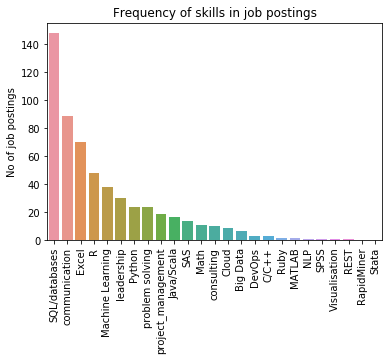

In [75]:
sums_of_skills = results_df.iloc[:, 5:].sum().sort_values(ascending=False)
sns.barplot(x=sums_of_skills.index, y=sums_of_skills)
plt.xticks(rotation=90)
plt.ylabel("No of job postings")
plt.title("Frequency of skills in job postings")
plt.show()

<a id='results_to_file'></a>
## 7. Saving results to a .csv file

Back to the [top](#top)

In [269]:
results_df.to_csv('data_science_skills.csv')
print("Results have been saved to file 'data_science_skills.csv'!")

Results have been saved to file 'data_science_skills.csv'!
